Data loading


In [1]:
import tensorflow as tf
%tensorflow_version 2.x
!pip install gpt-2-simple
import gpt_2_simple as gpt2

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
  Preparing metadata (setup.py) ... done
  Created wheel for gpt-2-simple: filename=gpt_2_simple-0.8.1-py3-none-any.whl size=24557 sha256=cbb0ab66853b7f5ff391913df7ca8ec7acd3fad16d897f6a5782608fa3c062ef
  Stored in directory: /root/.cache/pip/wheels/df/6a/fe/10d3223f78d1ac3e4c83bb4c5e2d28dfb1789c2fb4cc7ea8d0
Successfully built gpt-2-simple


In [2]:
import pandas as pd
data = pd.read_excel("/content/drive/MyDrive/English_septic_pure_news_sentences.xlsx")
def clean(sentence):
  characters_to_remove = "<>[]"
  translation = str.maketrans("","",characters_to_remove)
  return sentence.translate(translation)
modified_string = []
modified_pure_string = []
for i in range(len(data['SEPTIC SENTENCE'])):
  modified_string.append(clean(data['SEPTIC SENTENCE'][i]))
for i in range(len(data['PURE SENTENCE'])):
  modified_pure_string.append(clean(data['PURE SENTENCE'][i]))
data['cleaned_septic'] = modified_string #input
data['cleaned_pure'] = modified_pure_string #output

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:

gpt2.download_gpt2(model_name="124M")

Fetching checkpoint: 1.05Mit [00:00, 3.89Git/s]                                                     
Fetching encoder.json: 1.05Mit [00:06, 162kit/s]
Fetching hparams.json: 1.05Mit [00:00, 4.18Git/s]                                                   
Fetching model.ckpt.data-00000-of-00001: 498Mit [01:05, 7.63Mit/s]                                  
Fetching model.ckpt.index: 1.05Mit [00:00, 1.46Git/s]                                               
Fetching model.ckpt.meta: 1.05Mit [00:01, 733kit/s]
Fetching vocab.bpe: 1.05Mit [00:01, 656kit/s]


In [5]:
preprocessed_file_dir = "/content/drive/MyDrive/preprocessed_data (2).txt"


In [6]:

# Start TensorFlow session
sess = gpt2.start_tf_sess()

# Fine-tune the model using the preprocessed data
gpt2.finetune(
    sess,
    dataset=preprocessed_file_dir,
    model_name="124M",
    steps=800,  # Adjust steps based on your data size and resources
    restore_from="fresh",
    run_name="run1",
    print_every=10,
    sample_every=200,
    save_every=500,
)



Loading checkpoint models/124M/model.ckpt
Loading dataset...


100%|██████████| 1/1 [00:01<00:00,  1.47s/it]


dataset has 54373 tokens
Training...
[10 | 26.06] loss=1.98 avg=1.98
[20 | 47.45] loss=1.81 avg=1.89
[30 | 69.34] loss=1.66 avg=1.82
[40 | 91.82] loss=1.49 avg=1.73
[50 | 115.05] loss=1.32 avg=1.65
[60 | 138.53] loss=1.30 avg=1.59
[70 | 161.52] loss=1.03 avg=1.51
[80 | 184.48] loss=0.77 avg=1.41
[90 | 207.66] loss=0.63 avg=1.32
[100 | 230.89] loss=0.49 avg=1.23
[110 | 253.98] loss=0.44 avg=1.16
[120 | 277.10] loss=0.33 avg=1.08
[130 | 300.25] loss=0.19 avg=1.01
[140 | 323.45] loss=0.17 avg=0.95
[150 | 346.67] loss=0.21 avg=0.89
[160 | 369.85] loss=0.15 avg=0.84
[170 | 393.06] loss=0.15 avg=0.80
[180 | 416.24] loss=0.09 avg=0.76
[190 | 439.43] loss=0.09 avg=0.72
[200 | 462.59] loss=0.11 avg=0.69
======== SAMPLE 1 ========
 --> --> the BJP has so far refrained from targeting the Samajwadi Party which is supporting the Shivaism of former chief minister Shivakumar Indira and his government's policies. --> Congress president Rahul Gandhi’s response to the Lok Sabha and state assembly electi

Instructions for updating:
Use standard file APIs to delete files with this prefix.


In [7]:
# Function to generate a pure sentence from a septic sentence
def generate_pure_sentence(septic_sentence):
    prompt = f"{septic_sentence} -->"
    return gpt2.generate(sess, run_name='run1', prefix=prompt, length=50, temperature=0.7, nsamples=1, return_as_list=True)[0]

# Example usage
septic_sentence = "There appears to be some disquiet in Arun Jaitley's otherwise uneventful and tranquil politics."
pure_sentence = generate_pure_sentence(septic_sentence)
print(f"Pure sentence: {pure_sentence}")


Pure sentence: There appears to be some disquiet in Arun Jaitley's otherwise uneventful and tranquil politics. --> I think Arun Jaitley's generally changing politics may be causing some difficulties in his politics.
Given his superb form against the Kings, Nikki is confident she can return to form against the Dravidian juggernaut. --> Given his unexpected form


In [8]:
# Loop through each row in the 'cleaned_septic' column
output_sentences = []
for i in range(60):
    # Get the septic sentence from the current row
    septic_sentence = data['cleaned_septic'][i]

    # Generate the pure sentence using your GPT-2 model
    pure_sentence = generate_pure_sentence(septic_sentence)
    output_sentences.append(pure_sentence)
    # Assign the generated pure sentence to the 'gpt2' column at the current row




ValueError: Length of values (60) does not match length of index (905)

In [61]:
output_sentences

["There appears to be some disquiet in Arun Jaitley's otherwise uneventful and tranquil politics. --> There appears to be some disquiet in Arun Jaitley's otherwise uneventful and tranquil politics.\nGiven his superbly well-reasoned judgement in (concerning the appointment of non-Brahmin in Tamil Nadu) one would",
 "West Indies batting great Brian Lara is impressed with Rishabh Pant's much-improved off-side play, --> In his own half, --> He was very good at giving Rishabh pant's much improved off-side play,\nIndia have suffered a setback in their preparations for the eagerly-awaited four-Test series in Australia, --> India have suffered",
 'India cannot be complacent while dealing with the possible spread of COVID-19. --> I think It could be argued that the general feeling of the country is that the pandemic was a very bad deal for the country, and it will only get worse. --> I think The defence minister, Ashton on Monday, 23 June, said that',
 'Their mischiefs, throwing their weight ar

In [32]:
text_output = []
for i in range(len(output_sentences)):
  sentence = output_sentences[i]
  index = sentence.find("-->")
  text_after_arrow = sentence[index + len("-->") + 1:]
  text_output.append(text_after_arrow)


Matching of the sentences

In [35]:
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np

# Load the Universal Sentence Encoder
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

def cosine_similarity(embedding1, embedding2):
    dot_product = np.dot(embedding1, embedding2)
    norm_embedding1 = np.linalg.norm(embedding1)
    norm_embedding2 = np.linalg.norm(embedding2)
    similarity = dot_product / (norm_embedding1 * norm_embedding2)
    return similarity

In [36]:
import numpy as np
import tensorflow as tf
from sklearn.metrics.pairwise import cosine_similarity

# Assuming 'embed' is a TensorFlow function that computes embeddings
# and 'data' is a DataFrame containing 'cleaned_pure' column
# and 'output_sentences' is a list of sentences

similarity_scores = []

for i in range(len(output_sentences)):
    sentences = [data['cleaned_pure'][i], output_sentences[i]]
    sentence_embeddings = embed(sentences)
    similarity = tf.keras.losses.cosine_similarity(sentence_embeddings[0], sentence_embeddings[1])
    similarity_scores.append(similarity)

print(similarity_scores)


[<tf.Tensor 'Neg_241:0' shape=() dtype=float32>, <tf.Tensor 'Neg_242:0' shape=() dtype=float32>, <tf.Tensor 'Neg_243:0' shape=() dtype=float32>, <tf.Tensor 'Neg_244:0' shape=() dtype=float32>, <tf.Tensor 'Neg_245:0' shape=() dtype=float32>, <tf.Tensor 'Neg_246:0' shape=() dtype=float32>, <tf.Tensor 'Neg_247:0' shape=() dtype=float32>, <tf.Tensor 'Neg_248:0' shape=() dtype=float32>, <tf.Tensor 'Neg_249:0' shape=() dtype=float32>, <tf.Tensor 'Neg_250:0' shape=() dtype=float32>, <tf.Tensor 'Neg_251:0' shape=() dtype=float32>, <tf.Tensor 'Neg_252:0' shape=() dtype=float32>, <tf.Tensor 'Neg_253:0' shape=() dtype=float32>, <tf.Tensor 'Neg_254:0' shape=() dtype=float32>, <tf.Tensor 'Neg_255:0' shape=() dtype=float32>, <tf.Tensor 'Neg_256:0' shape=() dtype=float32>, <tf.Tensor 'Neg_257:0' shape=() dtype=float32>, <tf.Tensor 'Neg_258:0' shape=() dtype=float32>, <tf.Tensor 'Neg_259:0' shape=() dtype=float32>, <tf.Tensor 'Neg_260:0' shape=() dtype=float32>, <tf.Tensor 'Neg_261:0' shape=() dtype=f

In [14]:
type(similarity_scores)

list

In [15]:
sum(similarity_scores)/len(similarity_scores)

<tf.Tensor 'truediv_1:0' shape=() dtype=float32>

In [18]:
import numpy as np
import tensorflow as tf
from sklearn.metrics.pairwise import cosine_similarity

# Assuming 'embed' is a TensorFlow function that computes embeddings
# and 'data' is a DataFrame containing 'cleaned_pure' column
# and 'output_sentences' is a list of sentences

similarity_scores_1 = []

for i in range(len(output_sentences)):
    sentences = [data['cleaned_septic'][i], output_sentences[i]]
    sentence_embeddings = embed(sentences)
    similarity = tf.keras.losses.cosine_similarity(sentence_embeddings[0], sentence_embeddings[1])
    similarity_scores_1.append(similarity)

print(similarity_scores_1)


[<tf.Tensor 'Neg_181:0' shape=() dtype=float32>, <tf.Tensor 'Neg_182:0' shape=() dtype=float32>, <tf.Tensor 'Neg_183:0' shape=() dtype=float32>, <tf.Tensor 'Neg_184:0' shape=() dtype=float32>, <tf.Tensor 'Neg_185:0' shape=() dtype=float32>, <tf.Tensor 'Neg_186:0' shape=() dtype=float32>, <tf.Tensor 'Neg_187:0' shape=() dtype=float32>, <tf.Tensor 'Neg_188:0' shape=() dtype=float32>, <tf.Tensor 'Neg_189:0' shape=() dtype=float32>, <tf.Tensor 'Neg_190:0' shape=() dtype=float32>, <tf.Tensor 'Neg_191:0' shape=() dtype=float32>, <tf.Tensor 'Neg_192:0' shape=() dtype=float32>, <tf.Tensor 'Neg_193:0' shape=() dtype=float32>, <tf.Tensor 'Neg_194:0' shape=() dtype=float32>, <tf.Tensor 'Neg_195:0' shape=() dtype=float32>, <tf.Tensor 'Neg_196:0' shape=() dtype=float32>, <tf.Tensor 'Neg_197:0' shape=() dtype=float32>, <tf.Tensor 'Neg_198:0' shape=() dtype=float32>, <tf.Tensor 'Neg_199:0' shape=() dtype=float32>, <tf.Tensor 'Neg_200:0' shape=() dtype=float32>, <tf.Tensor 'Neg_201:0' shape=() dtype=f

In [23]:
!pip install sklearn

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [40]:
septic_sentences = data["cleaned_septic"][:60].astype(str).tolist()
type(septic_sentences[0])

str

In [39]:
type(text_output[0])

str

In [62]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity


all_sentences = septic_sentences + text_output

vectorizer = CountVectorizer()
sentence_vectors = vectorizer.fit_transform(all_sentences)

septic_vectors = sentence_vectors[:len(septic_sentences)]
text_vectors = sentence_vectors[len(septic_sentences):]

similarity_scores = cosine_similarity(septic_vectors, text_vectors)

similarity_list = []
# Print the similarity scores for each sentence pair
for i, (septic_sent, Gpt2_sent) in enumerate(zip(septic_sentences, text_output)):
    similarity = similarity_scores[i][i]  # Similarity between the same index sentences
    print(f"Pair {i+1}:")
    print("English sentences:", septic_sent)
    print("Gpt2 sentences:", Gpt2_sent)
    print("Similarity score:", similarity)
    similarity_list.append(similarity)
    print()


print('mean similarity score is : ' , sum(similarity_list)/len(similarity_list))


Pair 1:
English sentences: There is some disquiet in Arun Jaitley's politics
Gpt2 sentences: There appears to be some disquiet in Arun Jaitley's otherwise uneventful and tranquil politics.
Given his superbly well-reasoned judgement in (concerning the appointment of non-Brahmin in Tamil Nadu) one would
Similarity score: 0.516185401208764

Pair 2:
English sentences: I think West Indies batting great Brian Lara likes Rishabh pant's much improved off-side play.
Gpt2 sentences: In his own half, --> He was very good at giving Rishabh pant's much improved off-side play,
India have suffered a setback in their preparations for the eagerly-awaited four-Test series in Australia, --> India have suffered
Similarity score: 0.2608745973749755

Pair 3:
English sentences: India may not be satisfied while dealing with the possible spread of covid-19
Gpt2 sentences: I think It could be argued that the general feeling of the country is that the pandemic was a very bad deal for the country, and it will onl

In [63]:
print('mean similarity score is : ' , sum(similarity_list)/len(similarity_list))

mean similarity score is :  0.4944918939681186


In [64]:
pure_sentences = septic_sentences = data["cleaned_pure"][:60].astype(str).tolist()

In [65]:
# import pandas as pd
# from sklearn.feature_extraction.text import CountVectorizer
# from sklearn.metrics.pairwise import cosine_similarity


all_sentences = pure_sentences + text_output

vectorizer = CountVectorizer()
sentence_vectors = vectorizer.fit_transform(all_sentences)

pure_vectors = sentence_vectors[:len(pure_sentences)]
text_vectors = sentence_vectors[len(pure_sentences):]

similarity_scores_1 = cosine_similarity(pure_vectors, text_vectors)

similarity_list_1 = [] # for the pure sentences and the gpt2 generated sentences
# Print the similarity scores for each sentence pair
for i, (septic_sent, Gpt2_sent) in enumerate(zip(pure_sentences, text_output)):
    similarity_1 = similarity_scores_1[i][i]  # Similarity between the same index sentences
    print(f"Pair {i+1}:")
    print("English sentences:", septic_sent)
    print("Gpt2 sentences:", Gpt2_sent)
    print("Similarity score:", similarity)
    similarity_list_1.append(similarity)
    print()


print('mean similarity score is : ' , sum(similarity_list_1)/len(similarity_list_1))


Pair 1:
English sentences: There is some disquiet in Arun Jaitley's politics
Gpt2 sentences: There appears to be some disquiet in Arun Jaitley's otherwise uneventful and tranquil politics.
Given his superbly well-reasoned judgement in (concerning the appointment of non-Brahmin in Tamil Nadu) one would
Similarity score: 0.7642869980476025

Pair 2:
English sentences: I think West Indies batting great Brian Lara likes Rishabh pant's much improved off-side play.
Gpt2 sentences: In his own half, --> He was very good at giving Rishabh pant's much improved off-side play,
India have suffered a setback in their preparations for the eagerly-awaited four-Test series in Australia, --> India have suffered
Similarity score: 0.7642869980476025

Pair 3:
English sentences: India may not be satisfied while dealing with the possible spread of covid-19
Gpt2 sentences: I think It could be argued that the general feeling of the country is that the pandemic was a very bad deal for the country, and it will on

In [66]:
print('Accuracy of the model is : ' , sum(similarity_list_1)/len(similarity_list_1))

Accuracy of the model is :  0.7642869980476023


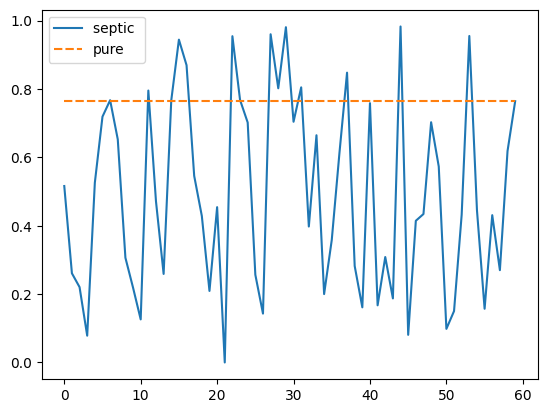

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf


# Create a DataFrame from the evaluated tensors
df = pd.DataFrame({'septic ': similarity_list, 'pure': similarity_list_1})

# Plot the graph using Seaborn
sns.lineplot(data=df)

# Show the plot
plt.show()
